# Configurations (Not necessary)
- [Cascade Models](https://github.com/opencv/opencv/tree/master/data/haarcascades/)

```python
options = ["eye", "eye_tree_eyeglasses", "frontalcatface", "frontalcatface_extended", 
            "frontalface_alt", "frontalface_alt2","frontalface_alt_tree",
            "frontalface_default","fullbody", "lefteye_2splits", "lowerbody",
            "profileface", "righteye_2splits", "smile", "upperbody"]

from urllib import request
def download_haarcascades(options=options, dir = ""):
  
  # preparing the file paths
  base_dir = "https://github.com/opencv/opencv/tree/master/data/haarcascades/"
  base_file = f"{base_dir}haarcascade_?.xml"
  absolute_url = [base_file.replace("?",opt) for opt in options]

  # downloading the files
  file_paths = []
  for url in absolute_url:
    file_path = os.path.join(dir,os.path.basename(url))
    request.urlretrieve(url, file_path)

    # collecting the local file paths
    file_paths.append(file_path)
  
  return file_paths
```

```python
haarcascade_dir = "haarcascade"
if not os.path.exists(haarcascade_dir): os.mkdir(haarcascade_dir)
file_paths = download_haarcascades(dir=haarcascade_dir)
file_paths
```

```python
import os 
os.system(f"zip -r {haarcascade_dir}.zip {haarcascade_dir}")
```

```python
from google.colab import files
files.download(f"{haarcascade_dir}.zip")
```

# Deployment

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

if os.system("pip freeze | grep gradio==") != 0: os.system("pip install gradio")
import gradio as gr


In [2]:
!unzip  examples.zip

Archive:  examples.zip
   creating: examples/
  inflating: examples/ronaldo.jpeg   
  inflating: examples/messi.jpeg     


In [3]:
options = ["eye", "eye_tree_eyeglasses", "frontalcatface", "frontalcatface_extended", 
            "frontalface_alt", "frontalface_alt2","frontalface_alt_tree",
            "frontalface_default","fullbody", "lefteye_2splits", "lowerbody",
            "profileface", "righteye_2splits", "smile", "upperbody"]


def detect(img, option):

  # preparing the corresponding file
  file_path = f"haarcascade_{option}.xml"
  valid_model_path = cv2.data.haarcascades + file_path

  # preparingt the image
  old_size = img.shape[:2]
  img = cv2.resize(img, (400, 600))
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  green, thickness = (0, 255, 0), 2

  # loading the model
  haarcascader = cv2.CascadeClassifier(valid_model_path)

  # detection
  detections = haarcascader.detectMultiScale(gray)

  # Drawing the ROI
  for (x, y, w, h) in detections:

    l_t, r_b = (x, y),(x+w, y+h)
    img = cv2.rectangle(img, l_t, r_b, green, thickness)

  
  img = cv2.resize(img, old_size)

  return img

In [4]:
ex_img = cv2.imread("examples/ronaldo.jpeg")
ex_img = cv2.cvtColor(ex_img, cv2.COLOR_BGR2RGB)
ex_opt = "frontalface_default"

In [5]:
detected_img = detect(ex_img, ex_opt)

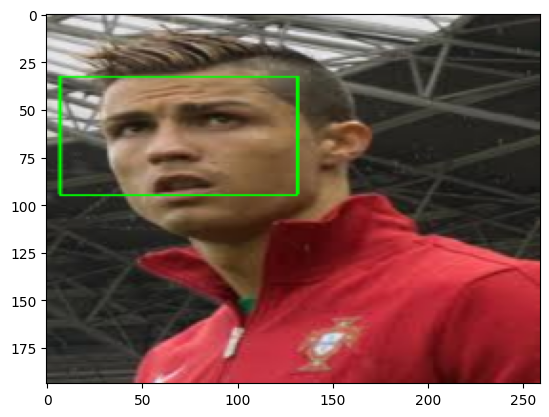

In [6]:
plt.imshow(detected_img);

In [7]:
import gradio as gr


with gr.Blocks() as demo:
    
    # creating the components
    img = gr.Image(type="numpy", source="upload")
    option = gr.Dropdown(choices = options, value="frontalface_default", label="Detector")
    detect_btn = gr.Button("Detect")
    output = gr.Image(type="numpy")

    # connecting the button functions
    detect_btn.click(detect, inputs=[img, option], outputs=output)

    # setting the exmples
    gr.Examples("examples", img)

In [8]:
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>